# Diabetes Prediction - Model Comparison

In this notebook, we'll compare different machine learning algorithms for diabetes prediction:
1. Logistic Regression
2. Random Forest
3. XGBoost
4. Support Vector Machine (SVM)

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import tree


# Set random seed for reproducibility
np.random.seed(42)
print("Libraries imported and random seed set.")

Libraries imported and random seed set.


## Load and Prepare Data

In [4]:
# Load the dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Training set shape:', X_train_scaled.shape)
print('Test set shape:', X_test_scaled.shape)

ValueError: could not convert string to float: 'Male'

## Model Training and Evaluation

We'll create a function to evaluate our models consistently:

In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f'\n{"="*50}')
    print(f'{model_name} Results:')
    print(f'{"="*50}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return accuracy, roc_auc

### 1. Logistic Regression


Logistic Regression Results:
Accuracy: 0.7532
ROC-AUC: 0.8147

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



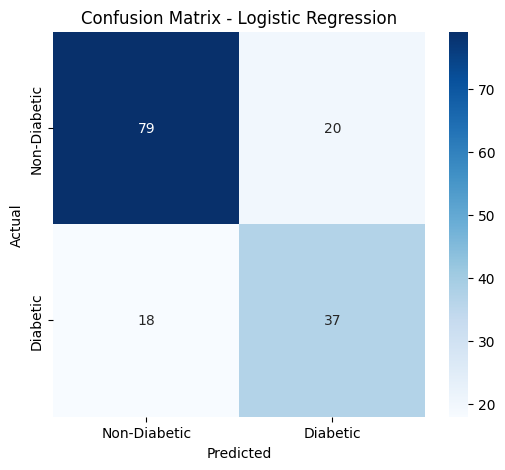

In [17]:
# Train and evaluate Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg_acc, log_reg_auc = evaluate_model(
    log_reg, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression'
)

### 2. Random Forest


Random Forest Results:
Accuracy: 0.7208
ROC-AUC: 0.8125

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



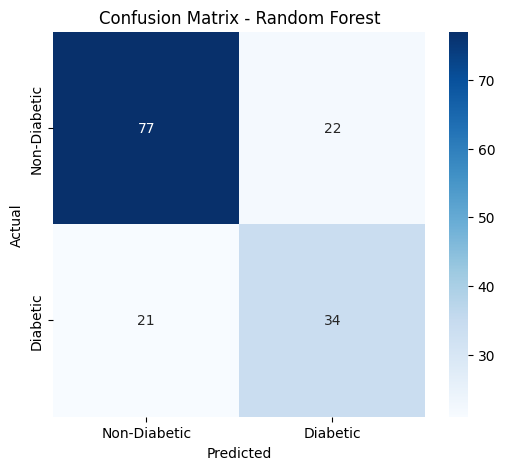

In [18]:
# Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_acc, rf_auc = evaluate_model(
    rf, X_train_scaled, X_test_scaled, y_train, y_test, 'Random Forest'
)

### 3. XGBoost


XGBoost Results:
Accuracy: 0.7532
ROC-AUC: 0.8147

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



c:\Users\shifttech\Desktop\Univ_M\AV\Tp\sign_Lang\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


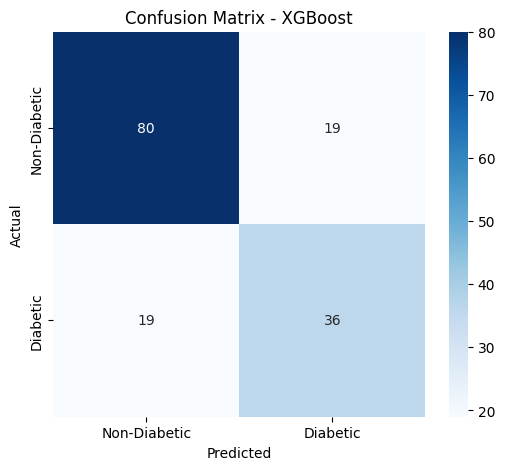

In [19]:
# Train and evaluate XGBoost
xgb = XGBClassifier(learning_rate = 0.05,
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 1.0)
xgb_acc, xgb_auc = evaluate_model(
    xgb, X_train_scaled, X_test_scaled, y_train, y_test, 'XGBoost'
)

### 4. Support Vector Machine


Support Vector Machine Results:
Accuracy: 0.7338
ROC-AUC: 0.8051

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



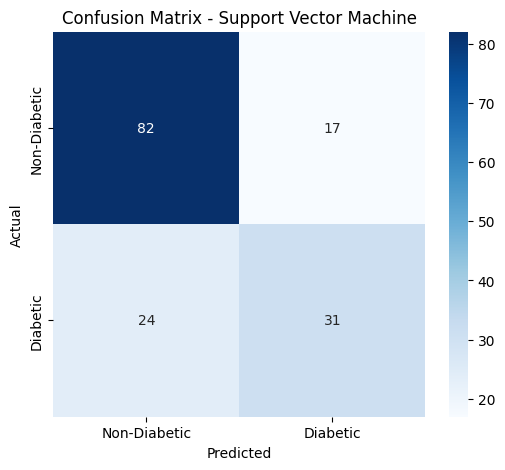

In [20]:
# Train and evaluate SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm_acc, svm_auc = evaluate_model(
    svm, X_train_scaled, X_test_scaled, y_train, y_test, 'Support Vector Machine'
)

## Decision Tree

In [24]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [28]:
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)

In [29]:
cart_tuned = cart.fit(X_train, y_train)


Decision Tree Results:
Accuracy: 0.7922
ROC-AUC: 0.8243

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



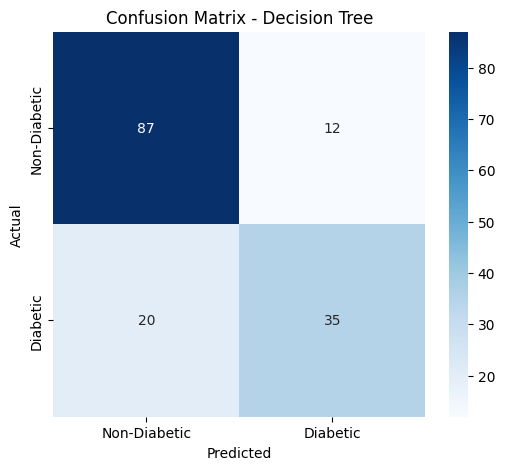

In [ ]:
cart_acc, cart_auc = evaluate_model(cart_tuned, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

## Model Comparison

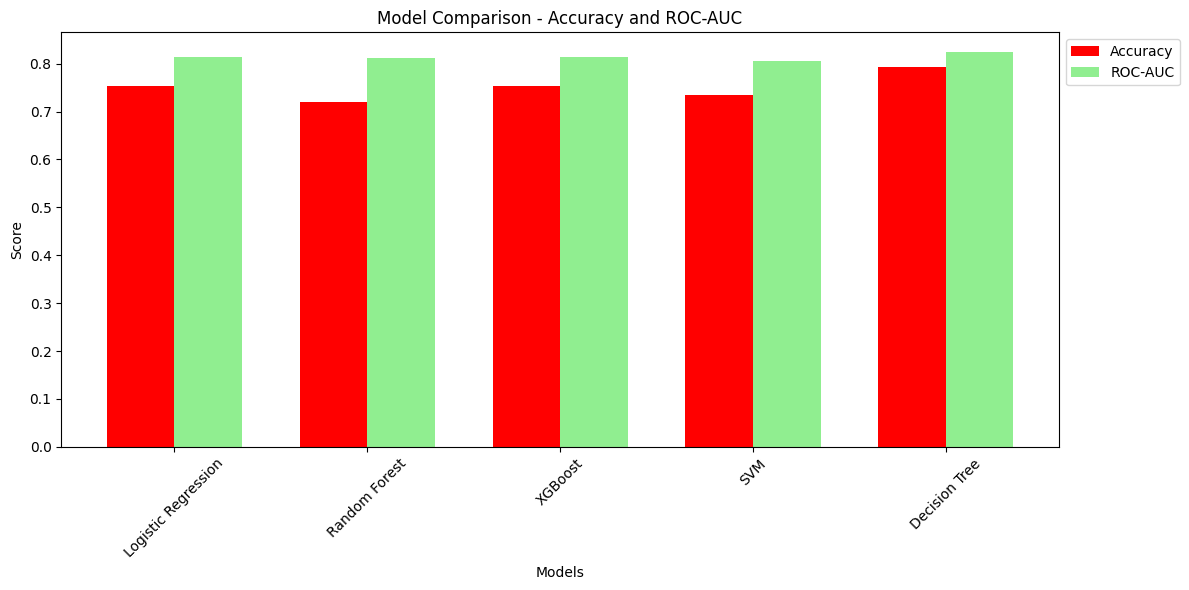


Model Comparison Summary:
              Model  Accuracy  ROC-AUC
Logistic Regression  0.753247 0.814692
      Random Forest  0.720779 0.812489
            XGBoost  0.753247 0.814692
                SVM  0.733766 0.805051
      Decision Tree  0.792208 0.824334


In [42]:
# Create comparison dataframe
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Decision Tree']
accuracies = [log_reg_acc, rf_acc, xgb_acc, svm_acc, cart_acc]
auc_scores = [log_reg_auc, rf_auc, xgb_auc, svm_auc, cart_auc]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'ROC-AUC': auc_scores
})

# Plot comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy', color='red')
plt.bar(x + width/2, auc_scores, width, label='ROC-AUC', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Accuracy and ROC-AUC')
plt.xticks(x, models, rotation=45)
plt.legend(
    loc='upper left', bbox_to_anchor=(1,1)
)
plt.tight_layout()
plt.show()

# Display comparison table
print('\nModel Comparison Summary:')
print('='*50)
print(comparison_df.to_string(index=False))